# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [17]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[-3]
# reverse the list
a.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a.reverse()
#a = list(np.array(a)**2)
print(a)

[1, 2, 3, 4, 5, 6]


In [27]:
# create a numpy array from this list
b = np.array(a) # change this

In [31]:
# find the mean of b
b.mean()

3.5

In [33]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b,b)
print(b)

[ 1  4  9 16 25 36]


In [49]:
# change b from a length-6 list to a 2x3 matrix
b = np.asmatrix(b)
b = b.reshape(2,3)
print(b)

[[ 1  4  9]
 [16 25 36]]


In [50]:
# find the mean value of each row
b.mean(axis=0)

matrix([[ 8.5, 14.5, 22.5]])

In [51]:
# find the mean value of each column
b.mean(axis=1)

matrix([[ 4.66666667],
        [25.66666667]])

In [52]:
# find the third column of b
b[:, 2]

matrix([[ 9],
        [36]])

In [83]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../checkpoint1/starbucks_clean.csv')
df.head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,Coffee,BrewedCoffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175
1,Coffee,BrewedCoffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260
2,Coffee,BrewedCoffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330
3,Coffee,BrewedCoffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410
4,ClassicEspressoDrinks,CaffLatte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75


In [73]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df.mean()

calories                193.871901
total fat                 2.904959
trans fat                 1.307025
saturated fat             0.037603
 sodium                   6.363636
total carbohydrates     128.884298
cholesterol              35.991736
dietary fibre             0.805785
sugars                   32.962810
protein                   6.978512
vitamin a                 9.830579
vitamin c                 3.648760
calcium                  20.756198
iron                      7.446281
dtype: float64

In [74]:
# how many different categories of beverages are there?
len(df["beverage"].unique())

33

In [75]:
# what is the average # calories for each beverage category?
df.groupby('beverage_category')['calories'].mean()

beverage_category
ClassicEspressoDrinks            140.172414
Coffee                             4.250000
FrappuccinoBlendedCoffee         276.944444
FrappuccinoBlendedCrme           233.076923
FrappuccinoLightBlendedCoffee    162.500000
ShakenIcedBeverages              114.444444
SignatureEspressoDrinks          250.000000
Smoothies                        282.222222
TazoTeaDrinks                    177.307692
Name: calories, dtype: float64

In [87]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage_prep')['sugars '].mean()

beverage_prep
2% Milk               30.980000
Doppio                 0.000000
Grande                20.000000
Grande Nonfat Milk    38.615385
Short                  8.250000
Short Nonfat Milk     17.000000
Solo                   0.000000
Soymilk               31.848485
Tall                  14.714286
Tall Nonfat Milk      28.521739
Venti                 27.714286
Venti Nonfat Milk     50.045455
Whole Milk            55.687500
Name: sugars , dtype: float64

In [89]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage')['calcium '].mean()

beverage
BananaChocolateSmoothie                      20.000000
BrewedCoffee                                  0.500000
CaffAmericano                                 1.500000
CaffLatte                                    35.000000
CaffMochaWithoutWhippedCream                 30.000000
Cappuccino                                   22.500000
Caramel                                      11.000000
CaramelAppleSpiceWithoutWhippedCream          0.000000
CaramelMacchiato                             28.333333
CaramelWithoutWhippedCream                   12.000000
Coffee                                       12.333333
Espresso                                      0.000000
HotChocolateWithoutWhippedCream              35.000000
IcedBrewedCoffeeWithClassicSyrup              0.000000
IcedBrewedCoffeeWithMilkClassicSyrup          8.000000
JavaChip                                     11.666667
JavaChipWithoutWhippedCream                  12.555556
Mocha                                        11.000000
M

In [100]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
drinks = df.groupby("beverage")
drinks[["calories", "protein "]].agg({"calories": "min", "protein " : "max"})

,calories,protein
beverage,,
BananaChocolateSmoothie,280,20.0
BrewedCoffee,3,1.0
CaffAmericano,5,1.0
CaffLatte,70,16.0
CaffMochaWithoutWhippedCream,110,17.0
Cappuccino,50,10.0
Caramel,100,5.0
CaramelAppleSpiceWithoutWhippedCream,140,0.0
CaramelMacchiato,100,13.0


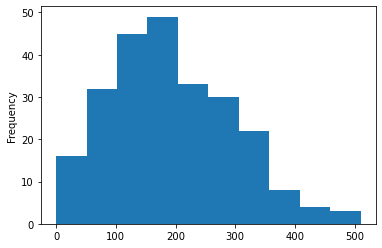

In [101]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df['calories'].plot.hist()

In [109]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x = 'calories')

AttributeError: module 'seaborn' has no attribute 'displot'

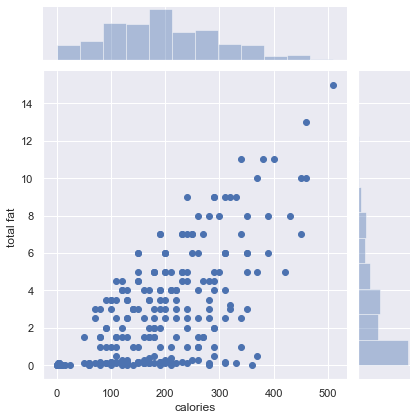

In [112]:
# plot calories against total fat using seaborn
sns.jointplot(data=df, x= "calories", y= "total fat ")

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,Coffee,BrewedCoffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175
1,Coffee,BrewedCoffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260
2,Coffee,BrewedCoffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330
3,Coffee,BrewedCoffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410
4,ClassicEspressoDrinks,CaffLatte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75


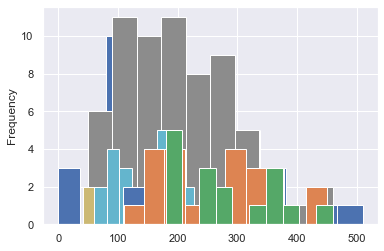

In [117]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.
size = df.groupby('beverage_prep')
size['calories'].plot.hist()
# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
df.head()